<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Setup](#setup)  
&nbsp;&nbsp;&nbsp;&nbsp; 1.1.) [Standard Imports](#imports)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.2.) [Visualization Imports](#imports)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.3.) [Helpers](#helpers)   
&nbsp;&nbsp;&nbsp;&nbsp; 1.4.) [Load data](#load)   
2.) [General Overview](#general)  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1.) [Timezone](#timezone)   
&nbsp;&nbsp;&nbsp;&nbsp; 2.2.) [Oldest Transcript](#oldest)   

---
<a id="setup"></a>

# [^](#toc) <u>Setup</u>

<a id="imports"></a>

### [^](#toc) Standard imports

In [2]:
### Standard imports
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

### Regex and datetime
import re
import datetime

# Helps convert String representation of list into a list
import ast

### Removes warnings that occassionally show in imports
import warnings
warnings.filterwarnings('ignore')

<a id="vis_imports"></a>

### [^](#toc) Visualization imports

In [3]:
### Standard imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Altair
import altair as alt
alt.renderers.enable('notebook')

### Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# WordCloud
from wordcloud import WordCloud

# Folium
import folium

<a id="helpers"></a>

### [^](#toc) Helpers

In [4]:
def string_literal(x):
    try:
        return ast.literal_eval(x)
    except:
        return x
    
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False, x=None, y=None):
    
    if x is None:
        x = data.values
    if y is None:
        y = data.index
    
    # Plots the data
    fig = sns.barplot(x, y, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(x):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

def pretty_transcript(transcript, convert_name=False):
    for speaker in transcript:
        if convert_name:
            speaker[0] = clean_names(speaker[0])
        print(color.UNDERLINE, speaker[0] + ":", color.END)
        for txt in speaker[1:]:
            print("\n\n   ".join(txt))
        print()
    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

<a id="load"></a>

### [^](#toc) Load data

In [5]:
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

df = pd.read_csv("data/PBS-newhour-clean.csv", parse_dates=['Date'], date_parser=dateparse)
for col in ["Transcript", "Story", "Speakers"]:
    df[col] = df[col].map(string_literal)

df.Speakers = df.Speakers.map(set)
df["Year"]  = df.Date.map(lambda x: x.year)
df["Month"] = df.Date.map(lambda x: x.month)

print("Shape of df:", df.shape)
df.head()

Shape of df: (17617, 10)


,URL,Story,Date,Title,Transcript,Speakers,Number of Comments,Timezone,Year,Month
0,https://www.pbs.org/newshour/show/robert-macne...,“How high did the scandals reach and was Presi...,1973-05-17 02:26:00,Watergate: The NewsHour’s 1973 Special Report,[],"{e, ), s, (, t}",0.0,EDT,1973,5
1,https://www.pbs.org/newshour/show/tempers-flar...,This MacNeil/Lehrer Report piece highlights th...,1979-06-29 06:00:00,Tempers Flare In Lines for Gasoline in 1979,[],"{e, ), s, (, t}",0.0,EDT,1979,6
2,https://www.pbs.org/newshour/show/margaret-tha...,Robert MacNeil and Jim Lehrer interviewed Brit...,1981-02-27 06:00:00,Newsmaker: Margaret Thatcher,[],"{e, ), s, (, t}",0.0,EDT,1981,2
3,https://www.pbs.org/newshour/show/macneil-lehr...,Jim Lehrer and Charlene Hunter Gault report on...,1982-10-25 06:00:00,"The MacNeil/Lehrer Report – October 25, 1982 –...",[],"{e, ), s, (, t}",0.0,EDT,1982,10
4,https://www.pbs.org/newshour/show/the-macneil-...,Robert MacNeil and Charlayne Hunter Gault repo...,1983-11-30 06:00:00,"The MacNeil/Lehrer Report from Nov. 30, 1983 o...",[],"{e, ), s, (, t}",0.0,EDT,1983,11


<a id="general"></a>

# [^](#toc) <u>General Overview</u>

<a id="timezone"></a>

### [^](#toc) Timezone

In [6]:
df.Timezone.value_counts()

EDT    17617
Name: Timezone, dtype: int64

<a id="oldest_clip"></a>

### [^](#toc) Oldest Clip

In [7]:
temp = df.iloc[0]

print(temp.Title)
print(temp.URL)

Watergate: The NewsHour’s 1973 Special Report
https://www.pbs.org/newshour/show/robert-macneil-and-jim-lehrer-and-the-watergate-hearings


<a id="oldest_transcript"></a>

### [^](#toc) Oldest Transcript

The oldest complete transcript on PBS's website is an interview with Fidel Castro in February of 1985.

In [8]:
temp = df[df.Transcript.map(lambda x: x != [])].iloc[0]

print(f"{color.BOLD}{temp.Date}{color.END}")
print(f"{color.BOLD}{temp.Title}{color.END}")
print()
pretty_transcript(temp.Transcript)

1985-02-11 06:00:00
Robert MacNeil Interviews Fidel Castro Part I

 ROBERT MacNEIL: 
 Our major focus section tonight is a newsmaker interview with Cuban President Fidel Castro. Last month the U.S. and Cuba successfully negotiated an agreement under which Cuba will take back 2,500 “undesirables” who came in the Mariel boat lift of 1980, and the United States will reopen normal immigration procedures in Havana.

   Since then Castro has said he’d be willing to talk further about improving relations. Washington has reacted coldly, saying Castro is saying nothing new, and it wants to see Cuban deeds, not words. How far Castro wishes to push his new effort has not been clear, but in Havana part of his motivation is obvious.

   Havana today expresses the weaknesses of the Cuban revolution. Its successes are in the countryside, where better nutrition, health care and education have changed more lives. Havana, the symbol of the decadent past, was neglected, with little new building. But with

<a id="old_5"></a>

### [^](#toc) 5 Oldest Stories


In [9]:
for i in range(5):
    print(df.iloc[i].Date)
    print(df.iloc[i].Story)
    print()

1973-05-17 02:26:00
“How high did the scandals reach and was President Nixon himself involved?” That was what the NewsHour’s Robert MacNeil, then co-anchoring with Jim Lehrer, dubbed “the ultimate question” as the program began its gavel-to-gavel coverage of the Watergate hearings on May 17, 1973.

1979-06-29 06:00:00
This MacNeil/Lehrer Report piece highlights the anguish caused by gas shortages at a station in Queens, New York in 1979.

1981-02-27 06:00:00
Robert MacNeil and Jim Lehrer interviewed British Prime Minister Margaret Thatcher for the The MacNeil/Lehrer Report in February of 1981.

1982-10-25 06:00:00
Jim Lehrer and Charlene Hunter Gault report on violence and instability across Guatemala and the actions of Efrain Rios Montt. Gavin Hewitt from the Canadian Broadcasting Corporation reports from Guatemala. Guests are Georges Fauriol of Georgetown University and Dana Martin of the Washington Office on Latin America.

1983-11-30 06:00:00
Robert MacNeil and Charlayne Hunter Gau

### Date spread

The activity starts around April 2011, so we have 7 years of history to analyze

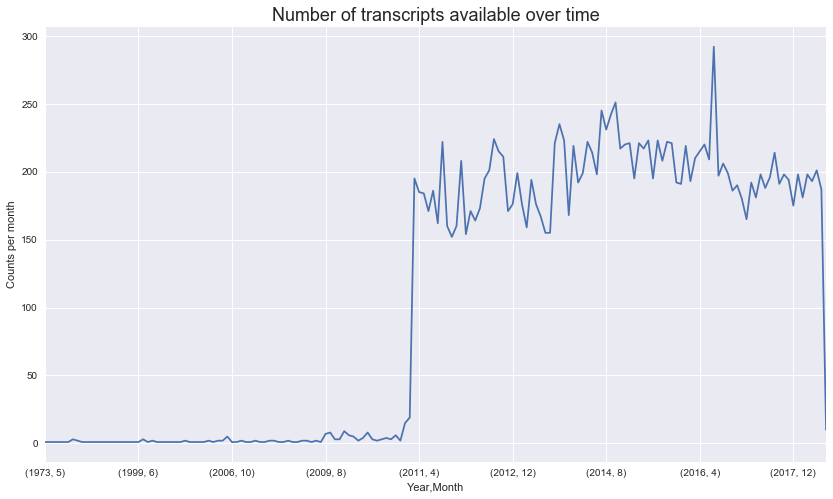

In [10]:
plt.figure(figsize=(14, 8))
plt.title("Number of transcripts available over time", fontsize=18)

(df
    .assign(n=0)
    .groupby(["Year", "Month"])
    .n
    .apply(len)
    .sort_index()
         ).plot().set(ylabel="Counts per month");

### Earliest interview

I think it's amazing just looking back 7 years.  So much has changed, but in another sense, not much has changed.

The earliest mention of Donald Trump is in 2011 when he was demanding Obama for his birth certificate.  During that segment he is considering running for office. ([link](https://www.pbs.org/newshour/show/with-birth-certificate-release-obama-urges-shift-in-national-dialogue)).  This is tangetial, but this [clip](https://www.pbs.org/newshour/show/with-birth-certificate-release-obama-urges-shift-in-national-dialogue) also features PBS' Jim Lehrer 40 years earlier.

The earliest mention of Bernie Sanders is him weighing in on the 2011 Debt Ceiling negotitions ([link](https://www.pbs.org/newshour/show/debt-deal-stalemate-spills-into-weekend-for-obama-congress)).  He warns that the burden will fall on the working class.

In [11]:
# {x for x in set.union(*df.Speakers) if "BEZOS" in x}

### These are just examples
pois = {0: "BERNIE SANDERS",
        1: "VLADIMIR PUTIN",
        2: "DONALD TRUMP",
        3: "JUDY WOODRUFF",
        4: "BEN CARSON",
        5: "STEPHEN COLBERT",
        6: "HILLARY CLINTON",
        7: "JOHN F. KENNEDY",
        8: "ANGELA MERKEL",
        9: "JEFF BEZOS",
        10: "XI JINPING"
}

poi = pois[8]

print("Showing results for:", poi)
df[df.Speakers.map(lambda x: poi in x)]

Showing results for: ANGELA MERKEL


,URL,Story,Date,Title,Transcript,Speakers,Number of Comments,Timezone,Year,Month
203,https://www.pbs.org/newshour/show/news-wrap-gu...,"In other news Wednesday, a gunman killed two U...",2011-03-02 07:50:00,"News Wrap: Gunman Kills 2 U.S. Airmen, Wounds ...","[[HARI SREENIVASAN, [ A gunman shot four U.S. ...","{BEN BERNANKE, ANGELA MERKEL, BARACK OBAMA, SH...",0.0,EDT,2011,3
275,https://www.pbs.org/newshour/show/japan-s-disa...,The nuclear crisis in Japan is raising questio...,2011-03-16 08:09:00,Japan’s Nuclear Crisis Raises Energy Questions...,"[[JUDY WOODRUFF, [ The nuclear crisis in Japan...","{KWAME HOLMAN, JUDY WOODRUFF, ANGELA MERKEL, B...",0.0,EDT,2011,3
289,https://www.pbs.org/newshour/show/ireland-s-ne...,Margaret Warner reports on Ireland's debt woes...,2011-03-17 08:42:00,Ireland’s New Leader Wrestles With Lingering D...,"[[JEFFREY BROWN, [ Next tonight, Europe’s debt...","{JEFFREY BROWN, ANGELA MERKEL, BARACK OBAMA, M...",0.0,EDT,2011,3
658,https://www.pbs.org/newshour/show/imf-chief-st...,"In New York, Judge Melissa Jackson denied IMF ...",2011-05-16 06:16:00,IMF Chief Strauss-Kahn Denied $1 Million Bail ...,"[[GWEN IFILL, [ An arrest in New York that is ...","{GIORGOS DEDOUSSIS, NIKOS ANTHOPOULOS, MELISSA...",0.0,EDT,2011,5
744,https://www.pbs.org/newshour/show/news-wrap-ye...,Government forces in Yemen went on the offensi...,2011-05-30 04:30:00,News Wrap: Yemeni Forces Try to Retake Militan...,"[[KWAME HOLMAN, [ Government forces in Yemen w...","{REBECCA HAMILTON, ANGELA MERKEL, KWAME HOLMAN}",0.0,EDT,2011,5
1835,https://www.pbs.org/newshour/show/war-torn-afg...,After twin suicide bombings killed dozens of S...,2011-12-06 06:02:00,War-Torn Afghanistan Suffers Worst Sectarian V...,"[[JUDY WOODRUFF, [ A suicide attacker killed 5...","{HILLARY CLINTON, YOUSUF RAZA GILANI, AFGHANIS...",0.0,EDT,2011,12
2935,https://www.pbs.org/newshour/show/greece-s-res...,World leaders reacted with cautious optimism a...,2012-06-18 06:03:00,Greece’s Respite Met With Cautious Optimism,"[[JEFFREY BROWN, [ Europe cleared a major hurd...","{JOSE MANUEL BARROSO, ANTONIS SAMARAS, DONALD ...",0.0,EDT,2012,6
3564,https://www.pbs.org/newshour/show/news-wrap-fa...,"In other news Wednesday, two fires at factorie...",2012-09-12 06:16:00,News Wrap: Industrial Factory Fires in Pakista...,"[[HARI SREENIVASAN, [ Two industrial fires in ...","{ANGELA MERKEL, HARI SREENIVASAN}",0.0,EDT,2012,9
3747,https://www.pbs.org/newshour/show/news-wrap-ac...,Girls’ education activist Malala Yousufzai was...,2012-10-09 06:11:00,"News Wrap: Activist for Girls’ Education, 14, ...","[[HARI SREENIVASAN, [ Questions swirled again ...","{JAMES MATES, ANGELA MERKEL, HARI SREENIVASAN,...",0.0,EDT,2012,10
6001,https://www.pbs.org/newshour/show/merkel-u-s-s...,"At a European Union summit, German Chancellor ...",2013-10-24 06:10:00,Will fallout of ‘spying on friends’ allegation...,"[[GWEN IFILL, [ A usually fractured European U...","{RONALD POFALLA, MARGARET WARNER, JEFFREY BROW...",0.0,EDT,2013,10


### Topic Popularity

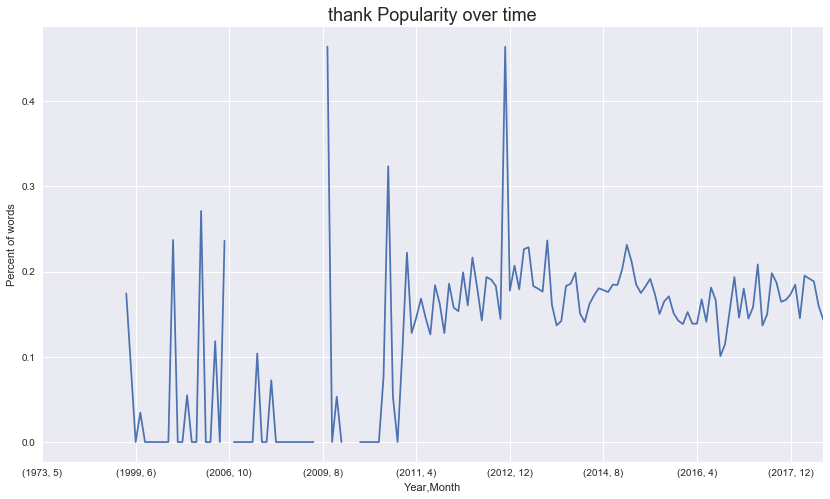

In [25]:
from collections import Counter

topic = "thank"

def topic_popularity(topic):
    def popularity_helper(transcript):
        transcript = list(map(lambda x: x[1][0], transcript))
        transcript = (" ".join(transcript).lower()).split(" ")
        N          = len(transcript)
        counts     = Counter(transcript)
        return (counts[topic.lower()] / N) * 100
    return popularity_helper

plt.figure(figsize=(14, 8))
plt.title(f"{topic} Popularity over time", fontsize=18)
plt.ylabel("Percent of words")

df["Temp"] = (
                df[df.Transcript.map(lambda x: x != [])]
                    .Transcript
                    .map(topic_popularity(topic))
                )

(df
     .groupby(["Year", "Month"])
     .Temp
     .apply(np.mean)
).plot();

---
<a id="movies"></a>

# [^](#toc) <u>Is News a Bad Movie?</u>

<a id="load_movie"></a>

### [^](#toc) Load data

In [34]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]
        
training_set = featuresets[:1900]
testing_set =  featuresets[1900:]

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

Naive Bayes Algo accuracy percent: 85.0
Most Informative Features
                   sucks = True              neg : pos    =     10.2 : 1.0
                  annual = True              pos : neg    =      9.7 : 1.0
                 idiotic = True              neg : pos    =      9.0 : 1.0
                 frances = True              pos : neg    =      8.4 : 1.0
           unimaginative = True              neg : pos    =      7.7 : 1.0
                  regard = True              pos : neg    =      7.0 : 1.0
             silverstone = True              neg : pos    =      7.0 : 1.0
                   groan = True              neg : pos    =      7.0 : 1.0
                  shoddy = True              neg : pos    =      7.0 : 1.0
              schumacher = True              neg : pos    =      7.0 : 1.0
               atrocious = True              neg : pos    =      7.0 : 1.0
                obstacle = True              pos : neg    =      6.3 : 1.0
                 singers = True   

In [43]:
import glob

train_dir = "data/large-movie-reviews/train/"
test_dir  = "data/large-movie-reviews/test/"

all_words, train, test = list(), list(), list()
for sent in ("pos", "neg"):
    for txt in glob.glob(train_dir + sent + "/*"):
        print(txt)
        txt = open(txt, "r")
        print(txt.read())
        txt.close()
        break

data/large-movie-reviews/train/pos/4715_9.txt
For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.
data/large-movie-reviews/train/neg/1821_4.txt
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.


In [ ]:
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb